<a href="https://colab.research.google.com/github/shuvo881/Various-Type-Model-CNN-DensNet-VGG-/blob/main/main%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Please, Don't Deep copy...***

# **Required library**

In [23]:
import numpy as np # linear algebra
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plot
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers

import keras.preprocessing.image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import rescale
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, \
    Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.applications.densenet import DenseNet201
import matplotlib.pyplot as plot
from sklearn.metrics import classification_report, confusion_matrix


# **Data Generate**



> Data preprocessing 







---



---



---







In [ ]:


train_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/PR lab 1/split data/val"
generator_train = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
generator_test = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)

generator_val = ImageDataGenerator(rescale=1./255, featurewise_center=False, samplewise_center=False,
                                     featurewise_std_normalization=False, samplewise_std_normalization=False,
                                     zca_whitening=False, rotation_range=0, width_shift_range=0,
                                     height_shift_range=0,
                                     horizontal_flip=True, vertical_flip=False)
train_ds = generator_train.flow_from_directory(train_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
test_ds = generator_test.flow_from_directory(test_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")
val_ds = generator_val.flow_from_directory(val_dir, target_size=(64,64), batch_size=32, class_mode="categorical", color_mode="rgb")


Found 598 images belonging to 26 classes.
Found 234 images belonging to 26 classes.
Found 182 images belonging to 26 classes.


# **CNN Model**



---



---



---



---




In [22]:


# Build the CNN model
model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5),
                 padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(3, 3), strides=2, padding='same'))
model.add(Conv2D(64, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))
model.add(Conv2D(32, kernel_size=(2, 2),
                  activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), 2, padding='same'))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=26,activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


# Train the model
hist = model.fit(train_ds, batch_size=5, epochs=50, validation_split=5, validation_data=test_ds)




Epoch 1/50
19/19 [==============================] - 20s 1s/step - loss: 3.2747 - accuracy: 0.0301 - val_loss: 3.2576 - val_accuracy: 0.0598
Epoch 2/50
19/19 [==============================] - 15s 759ms/step - loss: 3.2624 - accuracy: 0.0334 - val_loss: 3.2560 - val_accuracy: 0.0427
Epoch 3/50
19/19 [==============================] - 15s 761ms/step - loss: 3.2582 - accuracy: 0.0401 - val_loss: 3.2551 - val_accuracy: 0.0470
Epoch 4/50
19/19 [==============================] - 18s 968ms/step - loss: 3.2517 - accuracy: 0.0468 - val_loss: 3.2459 - val_accuracy: 0.0641
Epoch 5/50
19/19 [==============================] - 16s 857ms/step - loss: 3.2293 - accuracy: 0.0686 - val_loss: 3.2213 - val_accuracy: 0.0684
Epoch 6/50
19/19 [==============================] - 20s 1s/step - loss: 3.1244 - accuracy: 0.1037 - val_loss: 3.0818 - val_accuracy: 0.1068
Epoch 7/50
19/19 [==============================] - 21s 1s/step - loss: 2.8900 - accuracy: 0.1589 - val_loss: 2.9821 - val_accuracy: 0.1453
Epoch 8/

In [24]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))


MODEL ACCURACY = 96.32107019424438%


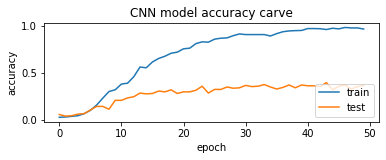

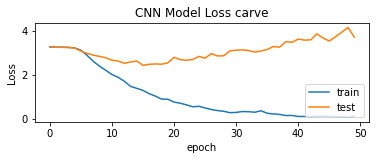

In [25]:
plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('CNN model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()


plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('CNN Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()



6/6 [==============================] - 1s 165ms/step
Confusion matrix:



<AxesSubplot:>

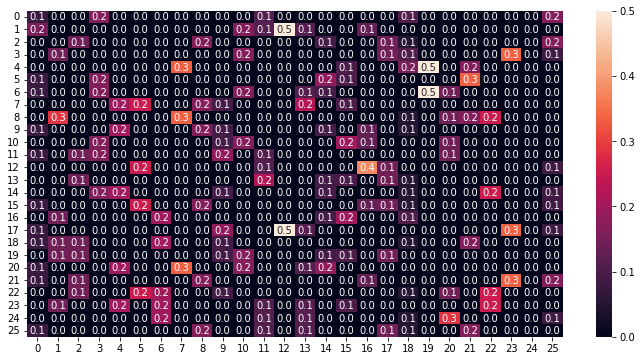

In [26]:


# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

print('Confusion matrix:\n')
plot.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")


In [27]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)


Confusion matrix Report:
               precision    recall  f1-score   support

           0       0.08      0.14      0.10         7
           1       0.00      0.00      0.00         7
           2       0.14      0.14      0.14         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.09      0.14      0.11         7
          10       0.17      0.14      0.15         7
          11       0.11      0.14      0.12         7
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         7
          14       0.09      0.14      0.11         7
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         7
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **DesNet**

---



---



---



---



In [29]:
def build_model(backbone):
  model = Sequential()
  model.add(backbone)
  model.add(layers.GlobalAveragePooling2D())
  model.add(Dropout(0.5))
  model.add(layers.BatchNormalization())
  model.add(Flatten())
  model.add(Dense(26, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


densent = DenseNet201(weights = 'imagenet', include_top=False)
model = build_model(densent)
model.summary()
hist = model.fit_generator(train_ds, steps_per_epoch=5, epochs=50, validation_data=test_ds, validation_steps=5)

p = model.predict(val_ds)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d_1   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1920)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1920)             7680      
 hNormalization)                                                 
                                                                 
 flatten_4 (Flatten)         (None, 1920)              0         
                                                                 
 dense_7 (Dense)             (None, 26)               

<ipython-input-29-2ac96e9a6c5d>:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_ds, steps_per_epoch=5, epochs=50, validation_data=test_ds, validation_steps=5)


Epoch 1/50
5/5 [==============================] - 103s 6s/step - loss: 3.5229 - accuracy: 0.0875 - val_loss: 8.9561 - val_accuracy: 0.0500
Epoch 2/50
5/5 [==============================] - 22s 4s/step - loss: 3.3613 - accuracy: 0.1312 - val_loss: 11.7158 - val_accuracy: 0.0312
Epoch 3/50
5/5 [==============================] - 24s 5s/step - loss: 3.1210 - accuracy: 0.1867 - val_loss: 9.8761 - val_accuracy: 0.0375
Epoch 4/50
5/5 [==============================] - 22s 4s/step - loss: 2.9097 - accuracy: 0.1750 - val_loss: 9.4091 - val_accuracy: 0.0625
Epoch 5/50
5/5 [==============================] - 22s 5s/step - loss: 2.5955 - accuracy: 0.2875 - val_loss: 14.5602 - val_accuracy: 0.0500
Epoch 6/50
5/5 [==============================] - 22s 5s/step - loss: 2.3316 - accuracy: 0.3313 - val_loss: 19.3737 - val_accuracy: 0.0312
Epoch 7/50
5/5 [==============================] - 22s 5s/step - loss: 2.0781 - accuracy: 0.4062 - val_loss: 18.2791 - val_accuracy: 0.0562
Epoch 8/50
5/5 [=============

In [30]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))

MODEL ACCURACY = 93.12499761581421%


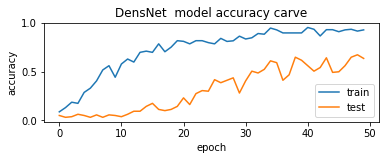

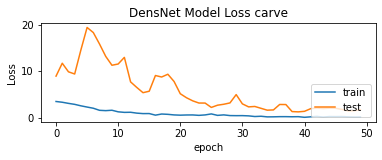

In [31]:



plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('DensNet  model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('DensNet Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

6/6 [==============================] - 5s 700ms/step


<AxesSubplot:>

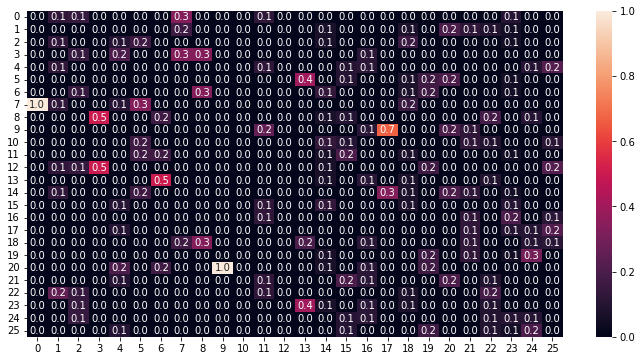

In [32]:
# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

#print('Confusion matrix:\n', conf_mat)
plot.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [33]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)

Confusion matrix Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         7
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VGG**

---



---



---



---



In [35]:


# Define the VGG architecture
def vgg_block(x, num_filters, num_layers):
    for i in range(num_layers):
        x = layers.Conv2D(num_filters, 3, padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(2, strides=2)(x)
    return x

input_shape = (64, 64, 3)
num_classes = 26

inputs = layers.Input(shape=input_shape)
x = vgg_block(inputs, 32, 2)
x = vgg_block(x, 64, 2)
x = vgg_block(x, 64, 3)
x = vgg_block(x, 120, 3)
x = vgg_block(x, 256, 3)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile and train the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(train_ds, batch_size=5, epochs=50, validation_data=test_ds)


Epoch 1/50
19/19 [==============================] - 30s 1s/step - loss: 3.2571 - accuracy: 0.0351 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 2/50
19/19 [==============================] - 25s 1s/step - loss: 3.2585 - accuracy: 0.0418 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 3/50
19/19 [==============================] - 25s 1s/step - loss: 3.2598 - accuracy: 0.0351 - val_loss: 3.2581 - val_accuracy: 0.0385
Epoch 4/50
19/19 [==============================] - 25s 1s/step - loss: 3.2578 - accuracy: 0.0418 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 5/50
19/19 [==============================] - 23s 1s/step - loss: 3.2603 - accuracy: 0.0318 - val_loss: 3.2582 - val_accuracy: 0.0385
Epoch 6/50
19/19 [==============================] - 26s 1s/step - loss: 3.2588 - accuracy: 0.0452 - val_loss: 3.2581 - val_accuracy: 0.0385
Epoch 7/50
19/19 [==============================] - 26s 1s/step - loss: 3.2581 - accuracy: 0.0351 - val_loss: 3.2581 - val_accuracy: 0.0385
Epoch 8/50
19/19 [==

In [36]:
print('MODEL ACCURACY = {}%'.format(hist.history["accuracy"][-1]*100))

MODEL ACCURACY = 3.8461539894342422%


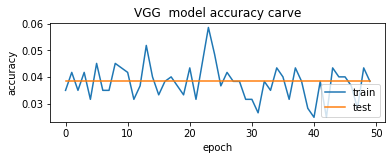

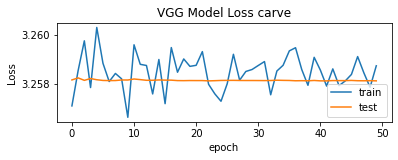

In [37]:

plot.subplot(2,1,1)
plot.plot(hist.history['accuracy'])
plot.plot(hist.history['val_accuracy'])
plot.title('VGG  model accuracy carve')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

plot.subplot(2,1,1)
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('VGG Model Loss carve')
plot.ylabel('Loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')
plot.show()

6/6 [==============================] - 2s 237ms/step


<AxesSubplot:>

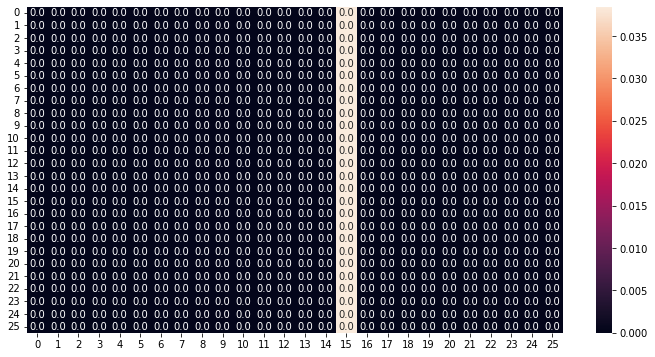

In [38]:
# Make predictions on the test data
y_pred = model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
# Generate the confusion matrix
conf_mat = confusion_matrix(val_ds.classes, y_pred_classes, normalize='pred')

#print('Confusion matrix:\n', conf_mat)
plot.figure(figsize=(12,6))
sns.heatmap(conf_mat, annot=True, fmt=".1f")

In [39]:

conf_mat_repot = classification_report(val_ds.classes, y_pred_classes)

print('Confusion matrix Report:\n', conf_mat_repot)

Confusion matrix Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         7
          15       0.04      1.00      0.07         7
          16       0.00      0.00      0.00         7
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
